<a href="https://colab.research.google.com/github/AndersonAvella/Machine-Learning/blob/main/PredictionRad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance Proyecto Primer Corte

---


Para el avance del primer corte de la asignatura de Fundamentos de Machine Learning, se escoge un dataset enfocado en la predicción de radiación solar.
Dicho dataset se toma de la pagina de Kaggle, y se compone principalmente de 6 variables, las cuales son:


*   Radiación
*   Temperatura
*   Presión
*   Humedad
*   Dirección del viento
*   Velocidad del viento

Tambien tiene columnas que indican el tiempo (fecha y hora) en el que se tomo la muestra, ademas de la hora del amanecer y atardecer de cada día en el que se tomaron las muestras.

Antes de empezar con el manejo de los datos se importan las librerias de pandas, numpy y matplotlib; las cuales son esenciales en el manejo de los dataframes.

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ahora se lee el dataframe en la siguiente línea de código:

In [437]:
df = pd.read_csv('/content/drive/MyDrive/SolarPrediction.csv')

Para ojear los datos se utiliza la siguiente línea de código:

In [438]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


Debido a que una de las columnas tiene entre se nombre unos paréntesis, se renombra para evitar problemas con la programación.

In [439]:
df = df.rename(columns={'WindDirection(Degrees)':'WindDirection'})

df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection', 'Speed', 'TimeSunRise', 'TimeSunSet'],
      dtype='object')

Debido a que el problema de interés es la radiación, se utiliza un poco de lógica booleana para eliminar los datos que se encuentran entre el atardecer y el amanecer (la noche cuando la radiación debería ser de cero).

In [440]:
ubic_day = (df.Time > df.TimeSunRise) & (df.Time < df.TimeSunSet)
print(ubic_day)

0        False
1        False
2        False
3        False
4        False
         ...  
32681    False
32682    False
32683    False
32684    False
32685    False
Length: 32686, dtype: bool


In [441]:
df_day = df[ubic_day]
df_day

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
69,1475208652,9/29/2016 12:00:00 AM,18:10:52,6.63,53,30.44,59,118.82,5.62,06:13:00,18:13:00
70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00
71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00
72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00
73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32600,1480611904,12/1/2016 12:00:00 AM,07:05:04,1.24,44,30.41,99,131.66,13.50,06:41:00,17:42:00
32601,1480611602,12/1/2016 12:00:00 AM,07:00:02,1.19,44,30.41,100,176.67,9.00,06:41:00,17:42:00
32602,1480611302,12/1/2016 12:00:00 AM,06:55:02,1.19,44,30.41,100,7.27,2.25,06:41:00,17:42:00
32603,1480611003,12/1/2016 12:00:00 AM,06:50:03,1.20,44,30.40,100,50.69,6.75,06:41:00,17:42:00


La siguiente línea de código se usa siempre que se necesite reestablecer el indexado.

In [442]:
df_day.reset_index(inplace=True, drop=False)
df_day

,index,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,69,1475208652,9/29/2016 12:00:00 AM,18:10:52,6.63,53,30.44,59,118.82,5.62,06:13:00,18:13:00
1,70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00
2,71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00
3,72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00
4,73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
15603,32600,1480611904,12/1/2016 12:00:00 AM,07:05:04,1.24,44,30.41,99,131.66,13.50,06:41:00,17:42:00
15604,32601,1480611602,12/1/2016 12:00:00 AM,07:00:02,1.19,44,30.41,100,176.67,9.00,06:41:00,17:42:00
15605,32602,1480611302,12/1/2016 12:00:00 AM,06:55:02,1.19,44,30.41,100,7.27,2.25,06:41:00,17:42:00
15606,32603,1480611003,12/1/2016 12:00:00 AM,06:50:03,1.20,44,30.40,100,50.69,6.75,06:41:00,17:42:00


Al reestablecer el indexado, se crea una nueva columna con el indexado anterior, con la siguiente línea de código se elimina esa columna no deseada.

In [443]:
df = df_day.drop(['index','UNIXTime','Time','Data','TimeSunRise','TimeSunSet'], axis=1)

En la línea de código anterior, se eliminaron las variables que tenian que ver con la fecha y hora, debido a que ahora nos centraremos en las 6 variables que se mencionaron al principio.

El dataset quedaría asi:

In [444]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25


Al eliminar los datos de la noche el dataframe cambio de tamaño, para saber cuantos datos por columna tiene se ejecuta la siguiente línea:

In [445]:
len(df)

15608

De esta manera se tienen 15607 datos por columna, ya que la función anterior tiene en cuenta la columna de titulos.

### Eliminación de Datos Atípicos

Para eliminar los datos atípicos se usa el diagrama de cajas y bigotes, el cual por medio de los cuartiles y el rango intercuartil, nos facilita la tarea de encontrar dichos valores atípicos.

Los diagramas de cada una de las variables se muestran a continuación:

Text(0.5, 1.0, 'Box Plot')

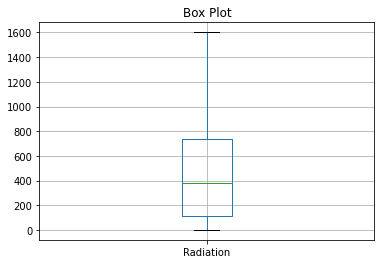

In [446]:
df.boxplot('Radiation')
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

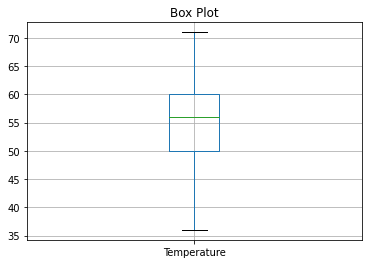

In [447]:
df.boxplot('Temperature')
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

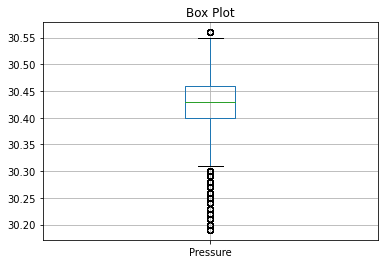

In [448]:
df.boxplot('Pressure')
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

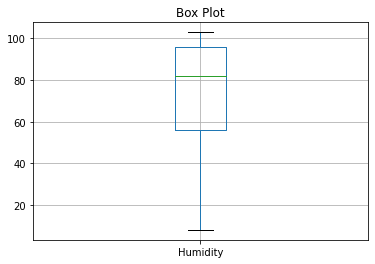

In [449]:
df.boxplot('Humidity')
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

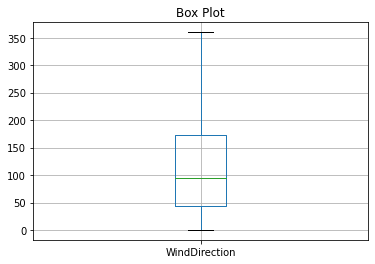

In [450]:
df.boxplot('WindDirection')
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

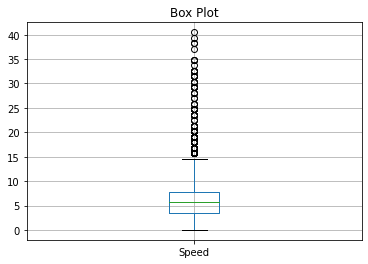

In [451]:
df.boxplot('Speed')
plt.title('Box Plot')

Los circulos fuera del tope de los bigotes del digrama representan los valores atípicos. Primero se eliminan los datos atípicos de la columna de presión.

Los datos calculados tambien se visualizan con la función 'describe', esto con fin de comparar.

In [452]:
df.Pressure.describe()

count    15608.000000
mean        30.422950
std          0.054372
min         30.190000
25%         30.400000
50%         30.430000
75%         30.460000
max         30.560000
Name: Pressure, dtype: float64

Datos calculados:

In [453]:
Q1 = df.Pressure.quantile(q=.25)
print('Primer cuartil:', Q1)
Q3 = df.Pressure.quantile(q=.75)
print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
print('Rango intercuartil:', IQR)
Mediana = df['Pressure'].median()
print('Mediana:', Mediana)
Valor_minimo = df['Pressure'].min()
print('Valor minimo:', Valor_minimo)
Valor_maximo = df['Pressure'].max()
print('Valor maximo:',Valor_maximo)

Primer cuartil: 30.4
Tercer cuartil: 30.46
Rango intercuartil: 0.060000000000002274
Mediana: 30.43
Valor minimo: 30.19
Valor maximo: 30.56


Formula para determinar el bigote superior e inferior:

In [454]:
BI = Q1 - (1.5*IQR)
print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
print('Bigote superior:',BS)

Bigote inferior: 30.309999999999995
Bigote superior: 30.550000000000004


A continuación se determina la ubicación de los datos sin valores atípicos (outliers).

In [455]:
ubi_sin_outliers = (df['Pressure'] > BI) & (df['Pressure'] < BS)
ubi_sin_outliers

0        True
1        True
2        True
3        True
4        True
         ... 
15603    True
15604    True
15605    True
15606    True
15607    True
Name: Pressure, Length: 15608, dtype: bool

Ahora se procede a crear un nuevo dataframe el cual se le borraron algunos datos atípicos que contenia la presión.

In [456]:
df = df[ubi_sin_outliers]
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
15603,1.24,44,30.41,99,131.66,13.50
15604,1.19,44,30.41,100,176.67,9.00
15605,1.19,44,30.41,100,7.27,2.25
15606,1.20,44,30.40,100,50.69,6.75


In [457]:
df.reset_index(inplace=True, drop=False)
df

,index,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,0,6.63,53,30.44,59,118.82,5.62
1,1,10.96,54,30.44,59,154.16,4.50
2,2,19.42,55,30.44,57,58.42,6.75
3,3,27.14,55,30.44,53,47.86,4.50
4,4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...,...
14796,15603,1.24,44,30.41,99,131.66,13.50
14797,15604,1.19,44,30.41,100,176.67,9.00
14798,15605,1.19,44,30.41,100,7.27,2.25
14799,15606,1.20,44,30.40,100,50.69,6.75


In [458]:
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
14796,1.24,44,30.41,99,131.66,13.50
14797,1.19,44,30.41,100,176.67,9.00
14798,1.19,44,30.41,100,7.27,2.25
14799,1.20,44,30.40,100,50.69,6.75


Ahora se vuelve a graficar el diagrama de cajas y bigotes para la presión, con el fin de observar si los datos atípicos desaparecieron en su totalidad.

Text(0.5, 1.0, 'Box Plot')

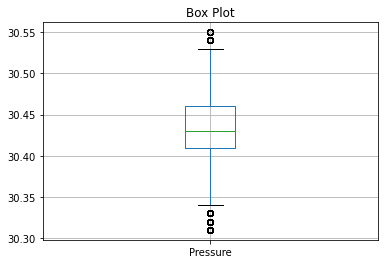

In [459]:
df.boxplot('Pressure')
plt.title('Box Plot')

Debido a que aun aparecen datos atípicos, se procede a repetir el procedimieno anterior para eliminarlos.

In [460]:
Q1 = df.Pressure.quantile(q=.25)
print('Primer cuartil:', Q1)
Q3 = df.Pressure.quantile(q=.75)
print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
print('Rango intercuartil:', IQR)
Mediana = df['Pressure'].median()
print('Mediana:', Mediana)
Valor_minimo = df['Pressure'].min()
print('Valor minimo:', Valor_minimo)
Valor_maximo = df['Pressure'].max()
print('Valor maximo:',Valor_maximo)

Primer cuartil: 30.41
Tercer cuartil: 30.46
Rango intercuartil: 0.05000000000000071
Mediana: 30.43
Valor minimo: 30.31
Valor maximo: 30.55


In [461]:
BI = Q1 - (1.5*IQR)
print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
print('Bigote superior:',BS)

Bigote inferior: 30.335
Bigote superior: 30.535000000000004


In [462]:
ubi_sin_outliers = (df['Pressure'] > BI) & (df['Pressure'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
14328,1.24,44,30.41,99,131.66,13.50
14329,1.19,44,30.41,100,176.67,9.00
14330,1.19,44,30.41,100,7.27,2.25
14331,1.20,44,30.40,100,50.69,6.75


Nuevamente se verifica que el diagrama nos indique si existen datos atípicos.

Text(0.5, 1.0, 'Box Plot')

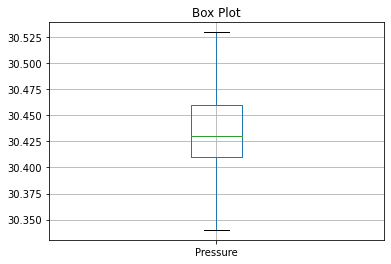

In [463]:
df.boxplot('Pressure')
plt.title('Box Plot')

Debido a que no aparecen más datos atípicos para la presión, se procede a eliminar los datos atípicos de las otras variables.

Para la velocidad:

Text(0.5, 1.0, 'Box Plot')

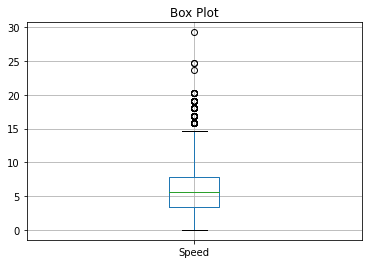

In [464]:
df.boxplot('Speed')
plt.title('Box Plot')

In [465]:
Q1 = df.Speed.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.Speed.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['Speed'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['Speed'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['Speed'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['Speed'] > BI) & (df['Speed'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
14189,1.24,44,30.41,99,131.66,13.50
14190,1.19,44,30.41,100,176.67,9.00
14191,1.19,44,30.41,100,7.27,2.25
14192,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

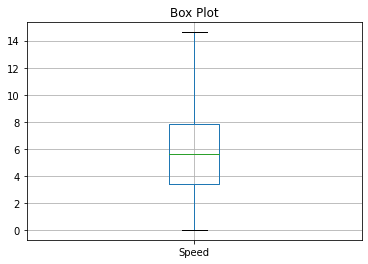

In [466]:
df.boxplot('Speed')
plt.title('Box Plot')

Para la velocidad del viento:

Text(0.5, 1.0, 'Box Plot')

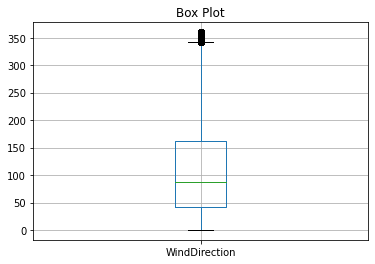

In [467]:
df.boxplot('WindDirection')
plt.title('Box Plot')

In [468]:
Q1 = df.WindDirection.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.WindDirection.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['WindDirection'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['WindDirection'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['WindDirection'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['WindDirection'] > BI) & (df['WindDirection'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
13439,1.24,44,30.41,99,131.66,13.50
13440,1.19,44,30.41,100,176.67,9.00
13441,1.19,44,30.41,100,7.27,2.25
13442,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

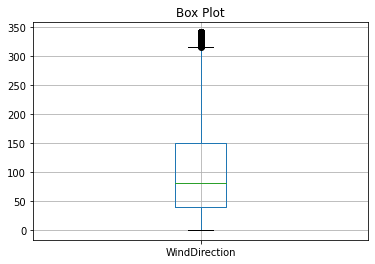

In [469]:
df.boxplot('WindDirection')
plt.title('Box Plot')

In [470]:
Q1 = df.WindDirection.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.WindDirection.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['WindDirection'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['WindDirection'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['WindDirection'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['WindDirection'] > BI) & (df['WindDirection'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
12718,1.24,44,30.41,99,131.66,13.50
12719,1.19,44,30.41,100,176.67,9.00
12720,1.19,44,30.41,100,7.27,2.25
12721,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

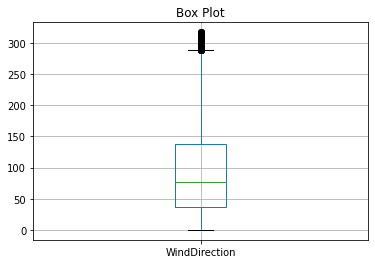

In [471]:
df.boxplot('WindDirection')
plt.title('Box Plot')

In [472]:
Q1 = df.WindDirection.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.WindDirection.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['WindDirection'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['WindDirection'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['WindDirection'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['WindDirection'] > BI) & (df['WindDirection'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
12390,1.24,44,30.41,99,131.66,13.50
12391,1.19,44,30.41,100,176.67,9.00
12392,1.19,44,30.41,100,7.27,2.25
12393,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

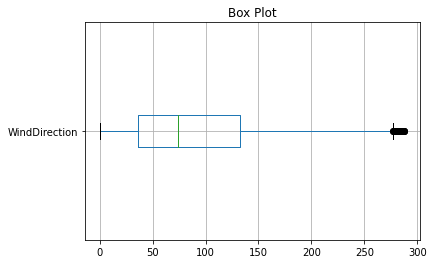

In [473]:
df.boxplot('WindDirection', vert=False)
plt.title('Box Plot')

In [474]:
Q1 = df.WindDirection.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.WindDirection.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['WindDirection'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['WindDirection'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['WindDirection'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['WindDirection'] > BI) & (df['WindDirection'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
12335,1.24,44,30.41,99,131.66,13.50
12336,1.19,44,30.41,100,176.67,9.00
12337,1.19,44,30.41,100,7.27,2.25
12338,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

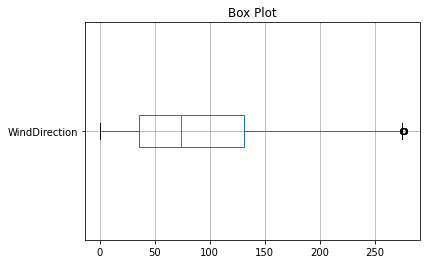

In [475]:
df.boxplot('WindDirection', vert=False)
plt.title('Box Plot')

In [476]:
Q1 = df.WindDirection.quantile(q=.25)
#print('Primer cuartil:', Q1)
Q3 = df.WindDirection.quantile(q=.75)
#print('Tercer cuartil:', Q3)
IQR = Q3 - Q1
#print('Rango intercuartil:', IQR)
Mediana = df['WindDirection'].median()
#print('Mediana:', Mediana)
Valor_minimo = df['WindDirection'].min()
#print('Valor minimo:', Valor_minimo)
Valor_maximo = df['WindDirection'].max()
#print('Valor maximo:',Valor_maximo)

BI = Q1 - (1.5*IQR)
#print('Bigote inferior:',BI)
BS = Q3 + (1.5*IQR)
#print('Bigote superior:',BS)

ubi_sin_outliers = (df['WindDirection'] > BI) & (df['WindDirection'] < BS)
df = df[ubi_sin_outliers]
df.reset_index(inplace=True, drop=False)
df = df.drop(['index'], axis=1)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,6.63,53,30.44,59,118.82,5.62
1,10.96,54,30.44,59,154.16,4.50
2,19.42,55,30.44,57,58.42,6.75
3,27.14,55,30.44,53,47.86,4.50
4,33.75,56,30.44,52,74.56,2.25
...,...,...,...,...,...,...
12327,1.24,44,30.41,99,131.66,13.50
12328,1.19,44,30.41,100,176.67,9.00
12329,1.19,44,30.41,100,7.27,2.25
12330,1.20,44,30.40,100,50.69,6.75


Text(0.5, 1.0, 'Box Plot')

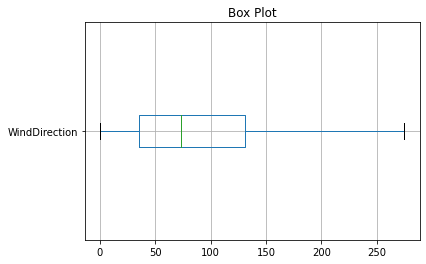

In [477]:
df.boxplot('WindDirection', vert=False)
plt.title('Box Plot')

Ahora que los datos atípicos fueron eliminados, se procede a normalizar el dataframe.

In [478]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
0,0.003400,0.419355,0.526316,0.536842,0.432228,0.384405
1,0.006106,0.451613,0.526316,0.536842,0.560891,0.307798
2,0.011393,0.483871,0.526316,0.515789,0.212328,0.461696
3,0.016218,0.483871,0.526316,0.473684,0.173881,0.307798
4,0.020349,0.516129,0.526316,0.463158,0.271089,0.153899


Para visualizar el histograma y la relación entre variables, se usa la función pairplot de la librería seaborn.

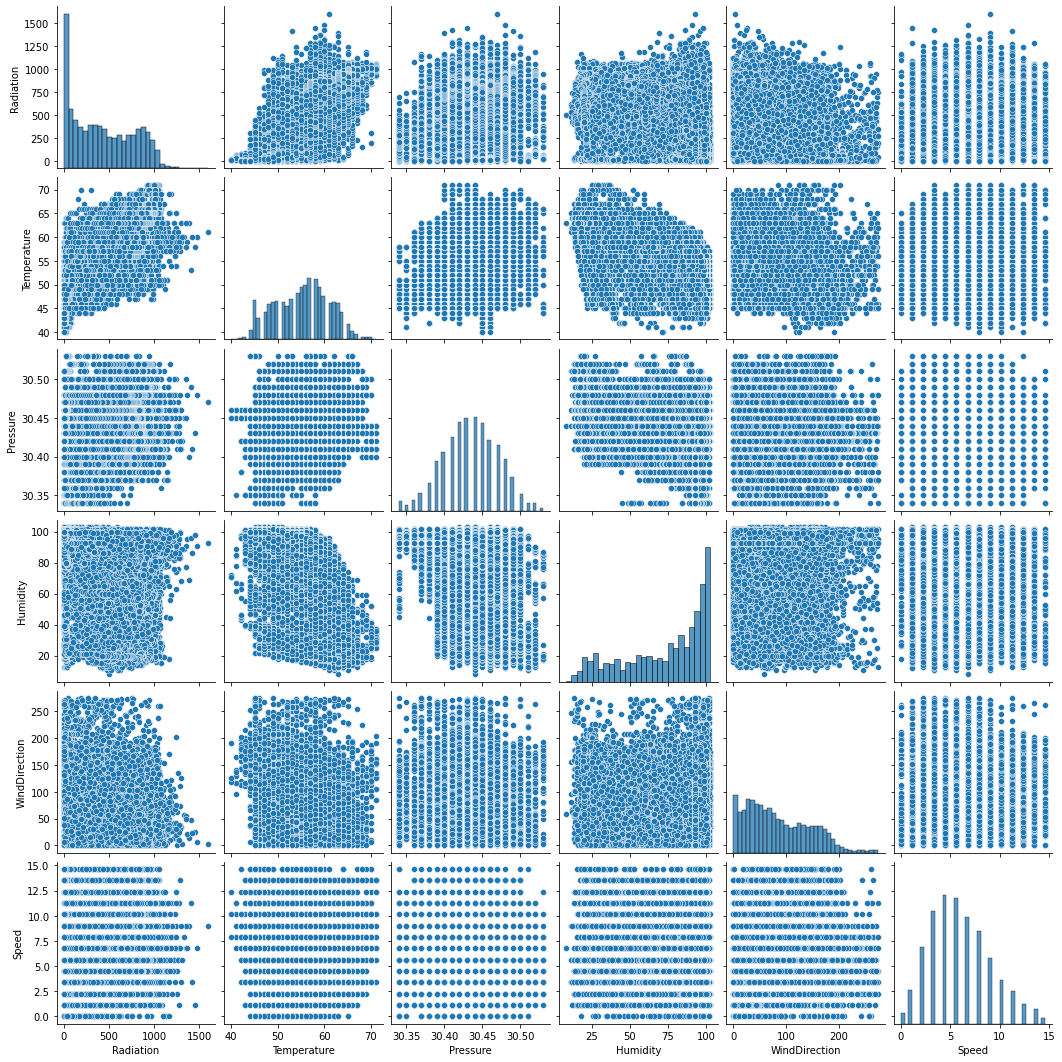

In [479]:
import seaborn as sns

sns.pairplot(df)

Tambien se puede obtener por separado el histograma con una linea suavizada que sigue su tipo de distribución.

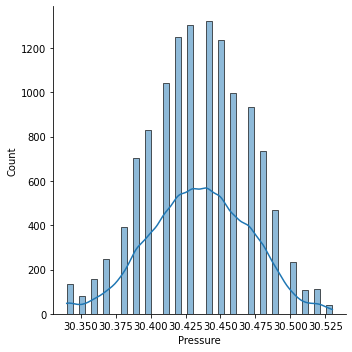

In [484]:
sns.displot(data=df, x="Pressure", kde=True)

La correlación lineal entre las variables se obtiene tambien por medio de la librería seaborn, como sigue:

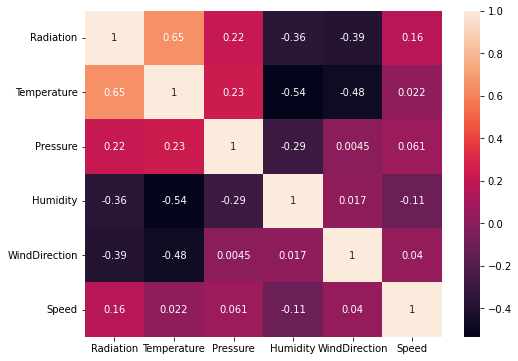

In [488]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Conclusiones

Para futuros analisis se puede tener en cuenta eliminar la columna de 'Dirección del Viento', debido a que para eliminar sus datos atípicos se tuvo que repetir el proceso varias veces. De manera que, afecta mucho a los datos y reduce el dataframe, ademas que la dirección del viento puede no ser tan primordial para la predicción, a menos que el analisis sea mucho mas complejo de lo que se requiere para este estudio.

La relación entre las variables parece no ser lineal (si es que existe relación), debido a que la correlación mas alta dio 0,65 (Pearson), la cual fue entre la Radiación y la Temperatura.